In [14]:
from wassnmf.validation import *
from wassnmf.wassdil import *
import torch

In [17]:
%load_ext autoreload
%autoreload 2

In [9]:
scenario =  {
    "name": "gaussian_mixture",
    "n_samples": 20,
    "n_features": 20
}

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Available device: {device}")

Available device: cuda


In [12]:
X_cuda = torch.tensor(X, device=device)
K_cuda = torch.tensor(K, device=device)

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim

def wasserstein_nmf(X, K, k, eps=0.025, rho1=0.05, rho2=0.05, n_iter=10):
    """
    Wasserstein NMF implementation in PyTorch

    Args:
        X: Input matrix
        K: Kernel matrix
        k: Rank of the factorization
        eps: Entropy regularization parameter
        rho1: Penalty parameter for the first constraint
        rho2: Penalty parameter for the second constraint
        n_iter: Number of iterations

    Returns:
        D, Λ: Factorization matrices
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize D and Λ
    D = torch.rand(X.shape[0], k, device=device, requires_grad=True)
    D.data = D.data / D.data.sum(dim=1, keepdim=True)
    Λ = torch.rand(k, X.shape[1], device=device, requires_grad=True)
    Λ.data = Λ.data / Λ.data.sum(dim=0, keepdim=True)

    # Define the optimizer
    optimizer = optim.Adam([D, Λ], lr=0.01)

    # Iterative optimization
    for _ in range(n_iter):
        # Compute the Wasserstein distance loss
        loss = torch.sum(K * (D @ Λ - X).pow(2)) + \
               rho1 * torch.sum(torch.log(D.sum(dim=1))) + \
               rho2 * torch.sum(torch.log(Λ.sum(dim=0))) + \
               eps * (torch.sum(D * torch.log(D)) + torch.sum(Λ * torch.log(Λ)))

        # Backpropagate and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Project D and Λ onto the simplex
        D.data = D.data / D.data.sum(dim=1, keepdim=True)
        Λ.data = Λ.data / Λ.data.sum(dim=0, keepdim=True)

    return D.detach().cpu().numpy(), Λ.detach().cpu().numpy()

In [ ]:
 wasserstein_nmf(X_cuda, K_cuda, 1)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]], dtype=float32))

In [41]:
model = WassersteinDiL(dtype=torch.float32)

In [42]:
D, Lambda = model.fit(X_cuda, K_cuda, 3, verbose=True, device=device)

INFO:wassnmf.wassdil:Training on device: cuda
INFO:wassnmf.wassdil:X shape: torch.Size([20, 20]), K shape: torch.Size([20, 20])


TypeError: WassersteinDiL.simplex_norm() missing 1 required positional argument: 'self'

In [90]:
from wassnmf.functional import *

In [79]:
nmf_model = WassersteinNMF(n_components=3, device='cuda', verbose=False,
                           n_iter=10)


In [100]:
X, K, coord, cost_matrix = generate_data(scenario)

In [105]:
X = X / X.sum()
coords = torch.randn(20, 2)  # Example: 2D coordinates for each row of X
K = torch.cdist(coords, coords) ** 2
K = torch.exp(-K / 0.1) # Gibbs Kernel


In [130]:
X_cuda = torch.tensor(X, device=device, dtype=torch.float32)#.cuda()
K_cuda = torch.tensor(K, device=device, dtype=torch.float32)#.cuda()

C:\Users\ecrob\AppData\Local\Temp\ipykernel_58732\4155475608.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K_cuda = torch.tensor(K, device=device, dtype=torch.float32)#.cuda()


In [131]:
X_cuda

tensor([[7.6892e-17, 6.3963e-22, 6.1746e-21, 2.8876e-16, 7.3601e-15, 3.6172e-13,
         3.2331e-13, 1.1016e-07, 7.8704e-19, 4.1213e-19, 5.1565e-24, 1.9146e-20,
         2.0479e-23, 1.2685e-16, 1.9540e-24, 1.5050e-17, 1.0696e-19, 1.3719e-17,
         4.7791e-27, 5.4413e-22],
        [2.5120e-11, 2.4334e-15, 1.6668e-14, 7.5118e-11, 1.2077e-09, 1.8782e-08,
         1.6964e-08, 1.2174e-04, 6.6834e-13, 4.6768e-13, 3.8279e-17, 4.1141e-14,
         1.4994e-16, 5.1522e-11, 2.1211e-17, 9.1020e-12, 1.4132e-13, 8.1396e-12,
         1.6788e-19, 2.5864e-15],
        [3.3749e-07, 3.8073e-10, 1.8504e-09, 8.0363e-07, 8.1503e-06, 4.0106e-05,
         3.6603e-05, 5.5332e-03, 2.3341e-08, 2.1826e-08, 1.1686e-11, 3.6357e-09,
         4.5146e-11, 8.6060e-07, 9.4686e-12, 2.2638e-07, 7.6793e-09, 1.9860e-07,
         2.4253e-13, 5.0560e-10],
        [1.8647e-04, 2.4498e-06, 8.4481e-06, 3.5357e-04, 2.2619e-03, 3.5220e-03,
         3.2481e-03, 1.0342e-02, 3.3522e-05, 4.1889e-05, 1.4673e-07, 1.3213e-05,
       

In [120]:
X_cuda.dtype, K_cuda.dtype

(torch.float64, torch.float64)

In [132]:
D_torch, Lambda_torch = wasserstein_nmf_gpu(X_cuda, 
                                            K_cuda, k, n_iter=1)

Wasserstein-NMF (GPU): iteration 1


In [133]:
D_torch

tensor([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]], grad_fn=<ToCopyBackward0>)

In [128]:
Lambda_torch

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<ToCopyBackward0>)

In [199]:
# Example data
m = 20  # Number of rows in X
n = 20 # Number of columns in X
k = 3   # Number of components
X, K, _, _ = generate_data(scenario)
X = torch.tensor(X, dtype=torch.float32)

In [204]:
K

array([[1.00000000e+00, 5.47986976e-01, 9.01739192e-02, 4.45586606e-03,
        6.61186204e-05, 2.94615717e-07, 3.94210794e-10, 1.58395043e-13,
        1.91115158e-17, 6.92451168e-22, 7.53396581e-27, 2.46149303e-32,
        2.41498284e-38, 7.11491900e-45, 6.29457401e-52, 1.67225769e-59,
        1.33407588e-67, 3.19593791e-76, 2.29909337e-85, 4.96655625e-95],
       [5.47986976e-01, 1.00000000e+00, 5.47986976e-01, 9.01739192e-02,
        4.45586606e-03, 6.61186204e-05, 2.94615717e-07, 3.94210794e-10,
        1.58395043e-13, 1.91115158e-17, 6.92451168e-22, 7.53396581e-27,
        2.46149303e-32, 2.41498284e-38, 7.11491900e-45, 6.29457401e-52,
        1.67225769e-59, 1.33407588e-67, 3.19593791e-76, 2.29909337e-85],
       [9.01739192e-02, 5.47986976e-01, 1.00000000e+00, 5.47986976e-01,
        9.01739192e-02, 4.45586606e-03, 6.61186204e-05, 2.94615717e-07,
        3.94210794e-10, 1.58395043e-13, 1.91115158e-17, 6.92451168e-22,
        7.53396581e-27, 2.46149303e-32, 2.41498284e-38, 7.1149

In [190]:

# X = torch.rand(m, n)
# X = X / X.sum(dim=0, keepdim=True) # ensure columns of X sum to 1

# Create a cost matrix (example: squared Euclidean distance)
# coords = torch.randn(m, 2)  # Example: 2D coordinates for each row of X
# K = torch.cdist(coords, coords) ** 2
# K = torch.exp(-K / 0.1) # Gibbs Kernel
K = torch.tensor(K, dtype=torch.float32)
 
# Move data to GPU
X_cuda = X.cuda()
K_cuda = K.cuda()

# Run GPU version
D_torch, Lambda_torch = wasserstein_nmf_gpu(X_cuda, K_cuda, k, n_iter=10)

# Verify reconstruction (should be close to the original X)
X_reconstructed = torch.matmul(D_torch, Lambda_torch)
print("\nReconstruction Error (GPU):", torch.norm(X.cpu() - X_reconstructed)) #compare with X on the CPU

Wasserstein-NMF (GPU): iteration 1
Wasserstein-NMF (GPU): iteration 2
Wasserstein-NMF (GPU): iteration 3
Wasserstein-NMF (GPU): iteration 4
Wasserstein-NMF (GPU): iteration 5
Wasserstein-NMF (GPU): iteration 6
Wasserstein-NMF (GPU): iteration 7
Wasserstein-NMF (GPU): iteration 8
Wasserstein-NMF (GPU): iteration 9
Wasserstein-NMF (GPU): iteration 10

Reconstruction Error (GPU): tensor(1.4687, grad_fn=<LinalgVectorNormBackward0>)


In [57]:
import seaborn as sns

In [152]:
X_rec = D_torch @ Lambda_torch

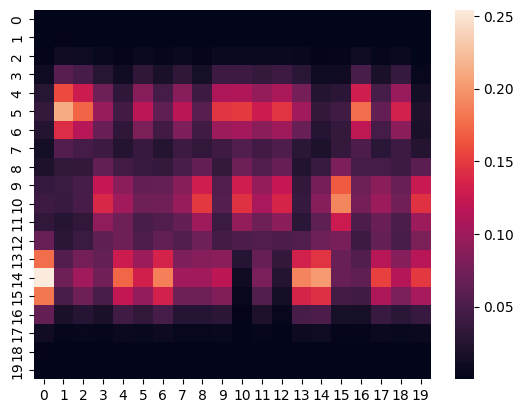

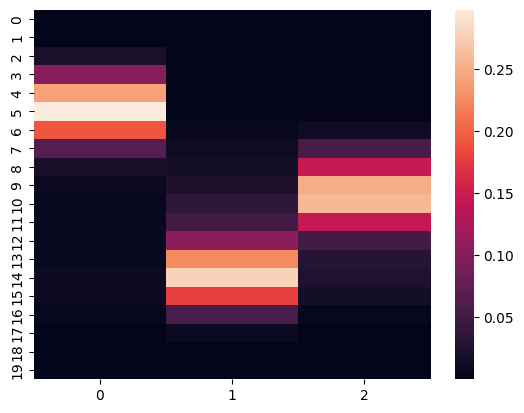

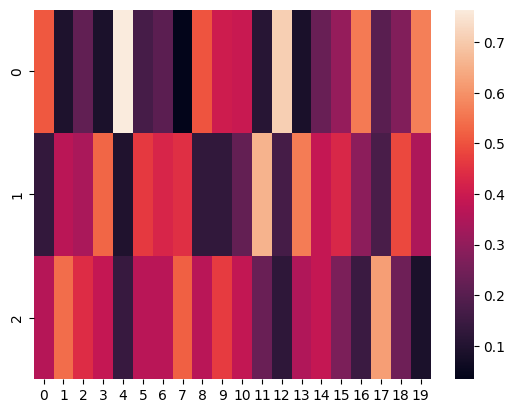

In [191]:
import matplotlib.pyplot as plt

sns.heatmap(X_rec.detach().numpy())

plt.show()

sns.heatmap(D_torch.detach().numpy())
plt.show()

sns.heatmap(Lambda_torch.detach().numpy())
plt.show() 

<Axes: >

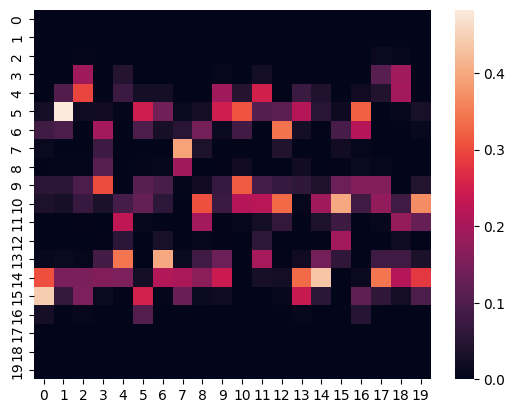

In [154]:
sns.heatmap(X)

<Axes: >

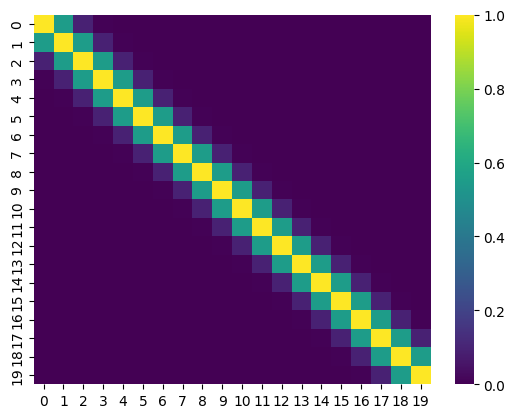

In [192]:



sns.heatmap(K.detach().numpy(), cmap='viridis')


In [162]:
from sklearn.decomposition import NMF

In [163]:
model = NMF(n_components=3, init='random', random_state=0)

In [165]:
W = model.fit_transform(X)
H = model.components_

In [166]:
X_nmf = np.dot(W, H)

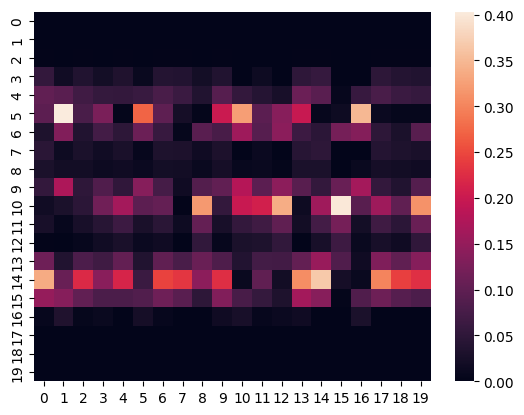

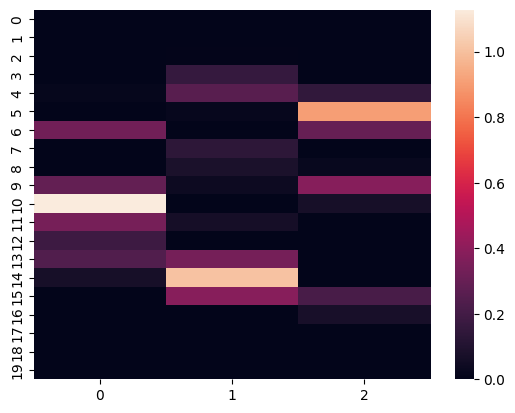

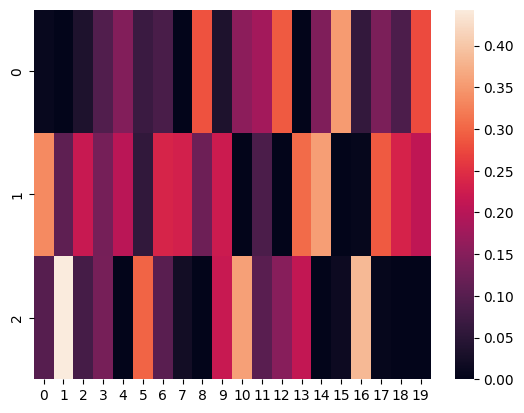

In [168]:
sns.heatmap(X_nmf)
plt.show()

sns.heatmap(W)
plt.show()  

sns.heatmap(H)
plt.show()  

In [169]:
import wsingular

In [193]:
# Example data
m = 20  # Number of rows in X
n = 20 # Number of columns in X
k = 3   # Number of components
X, K, _, _ = generate_data(scenario)
X = torch.tensor(X, dtype=torch.float32)

In [172]:
C, D = wsingular.sinkhorn_singular_vectors(
    X,
    eps=5e-2,
    dtype=X.dtype,
    device=device,
    n_iter=100,
    progress_bar=True,
)

  0%|          | 0/190 [00:00<?, ?it/s]c:\Users\ecrob\Projects\wassdil\wassnmf\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


In [174]:
C, D = C.cpu(), D.cpu()

In [205]:
C

tensor([[0.0000, 0.1625, 0.0452, 0.0560, 0.0955, 0.0497, 0.0767, 0.0562, 0.4521,
         0.0958, 0.5433, 0.1687, 0.1047, 0.0979, 0.0798, 0.0865, 0.2015, 0.1147,
         0.2426, 0.0471],
        [0.1625, 0.0000, 0.1270, 0.1507, 0.0651, 0.1640, 0.0762, 0.1448, 0.8739,
         0.3611, 1.0000, 0.4593, 0.2508, 0.0537, 0.2102, 0.1358, 0.5480, 0.2125,
         0.6120, 0.0819],
        [0.0452, 0.1270, 0.0000, 0.0598, 0.0886, 0.0898, 0.0573, 0.0611, 0.5219,
         0.1455, 0.6202, 0.2222, 0.1094, 0.0657, 0.0773, 0.0866, 0.2750, 0.0985,
         0.3072, 0.0505],
        [0.0560, 0.1507, 0.0598, 0.0000, 0.0682, 0.0422, 0.0766, 0.0086, 0.4464,
         0.0886, 0.5429, 0.1920, 0.0502, 0.0722, 0.0176, 0.0496, 0.2369, 0.0836,
         0.2529, 0.0355],
        [0.0955, 0.0651, 0.0886, 0.0682, 0.0000, 0.0684, 0.0714, 0.0623, 0.6757,
         0.2245, 0.7772, 0.3015, 0.1606, 0.0490, 0.1233, 0.0791, 0.3660, 0.1869,
         0.4271, 0.0274],
        [0.0497, 0.1640, 0.0898, 0.0422, 0.0684, 0.0000, 0.1

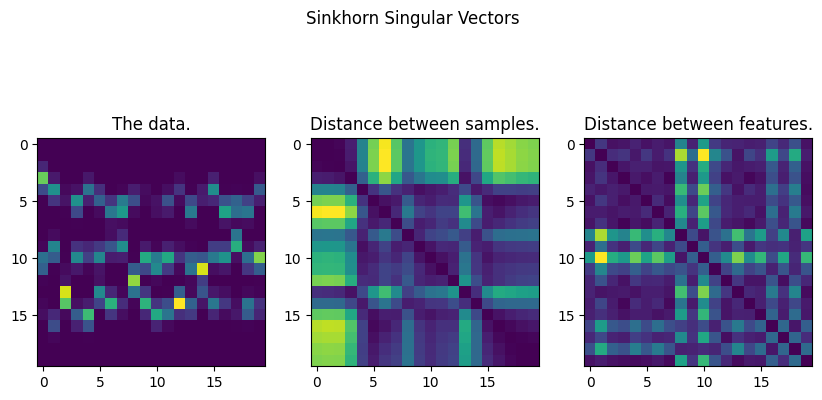

In [214]:
# Display the SSV.
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Sinkhorn Singular Vectors')

axes[0].set_title('The data.')
axes[0].imshow(X)
axes[0].set_xticks(range(0, m, 5))
axes[0].set_yticks(range(0, m, 5))

axes[1].set_title('Distance between samples.')
axes[1].imshow(D)
axes[1].set_xticks(range(0, m, 5))
axes[1].set_yticks(range(0, m, 5))

axes[2].set_title('Distance between features.')
axes[2].imshow(C)
axes[2].set_xticks(range(0, n, 5))
axes[2].set_yticks(range(0, n, 5))

plt.show()

In [198]:
C.sum()

tensor(83.4485)

In [222]:

K = torch.exp(-D / 0.01)  # Gibbs Kernel, eps
# K = D
 
# Move data to GPU
X_cuda = X.cuda()
K_cuda = K.cuda()

# Run GPU version
D_torch, Lambda_torch = wasserstein_nmf_gpu(X_cuda, K_cuda, k, n_iter=10)

# Verify reconstruction (should be close to the original X)
X_reconstructed_C = torch.matmul(D_torch, Lambda_torch)
print("\nReconstruction Error (GPU):", torch.norm(X.cpu() - X_reconstructed_C)) #compare with X on the CPU

Wasserstein-NMF (GPU): iteration 1
Wasserstein-NMF (GPU): iteration 2
Wasserstein-NMF (GPU): iteration 3
Wasserstein-NMF (GPU): iteration 4
Wasserstein-NMF (GPU): iteration 5
Wasserstein-NMF (GPU): iteration 6
Wasserstein-NMF (GPU): iteration 7
Wasserstein-NMF (GPU): iteration 8
Wasserstein-NMF (GPU): iteration 9
Wasserstein-NMF (GPU): iteration 10

Reconstruction Error (GPU): tensor(1.3491, grad_fn=<LinalgVectorNormBackward0>)


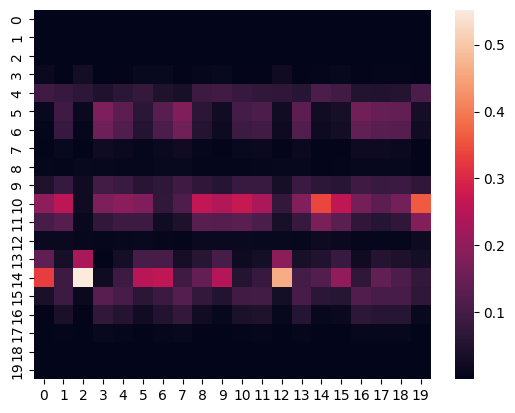

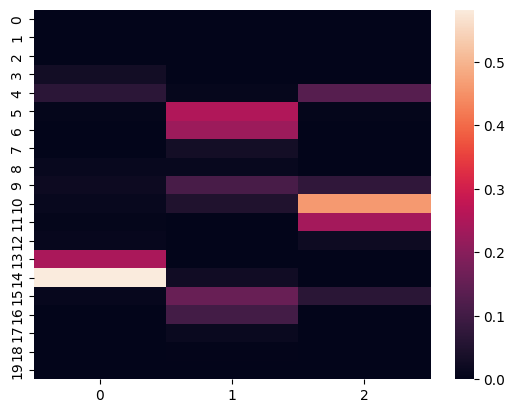

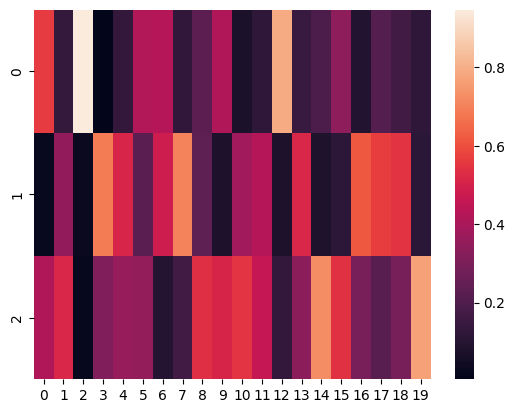

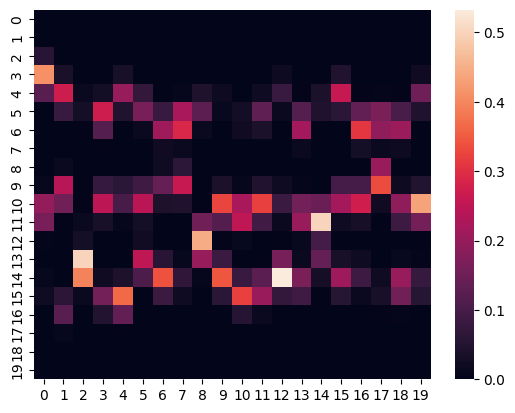

In [223]:
import matplotlib.pyplot as plt

sns.heatmap(X_reconstructed_C.detach().numpy())

plt.show()

sns.heatmap(D_torch.detach().numpy())
plt.show()

sns.heatmap(Lambda_torch.detach().numpy())
plt.show() 

sns.heatmap(X.detach().numpy())
plt.show() 

In [232]:
D_np =  D_torch.detach().numpy()
dominant_component = np.argmax(np.var(D_np, axis=0))

In [344]:
# gibbs kernel of D_torch
Dk = torch.exp(D_torch / 0.1)

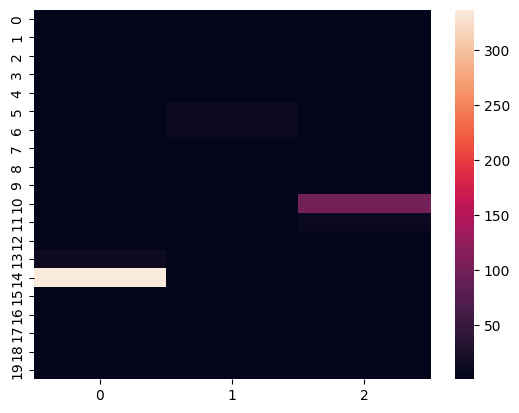

In [345]:
sns.heatmap(Dk.detach().numpy())
plt.show() 

In [234]:
pseudotime = D_np[:, dominant_component]

In [309]:
sample_order

array([ 6, 19, 18,  7,  0, 17,  1,  2, 16,  5, 11, 15, 12,  8, 10,  9,  3,
        4, 13, 14])

In [311]:
pseudotime

array([2.3180908e-04, 3.2026027e-04, 7.2633970e-04, 2.8107431e-02,
       6.6675603e-02, 5.6103584e-03, 3.9848628e-06, 2.1770687e-04,
       1.1419166e-02, 1.9640438e-02, 1.1697046e-02, 6.1527248e-03,
       1.0369334e-02, 2.4527931e-01, 5.8196384e-01, 1.0128299e-02,
       1.0546600e-03, 2.6617298e-04, 9.3569215e-05, 4.1973919e-05],
      dtype=float32)

In [308]:
sample_order = np.argsort(pseudotime)
sorted_pseudotime = np.sort(pseudotime)

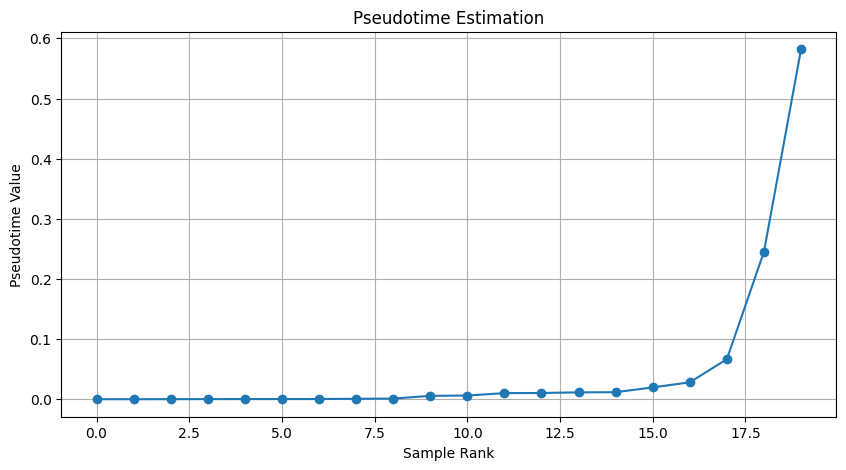

In [238]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(sorted_pseudotime)), sorted_pseudotime, marker="o", linestyle="-")
plt.xlabel("Sample Rank")
plt.ylabel("Pseudotime Value")
plt.title("Pseudotime Estimation")
plt.grid()
plt.show()


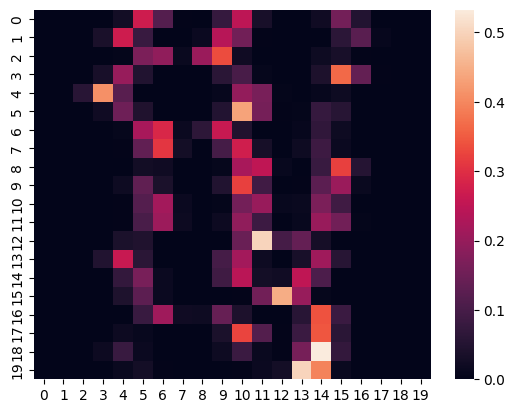

In [336]:
sns.heatmap(X.T[np.argsort(pca_pt.T)[0]])
plt.show() 

In [246]:
from sklearn.decomposition import PCA

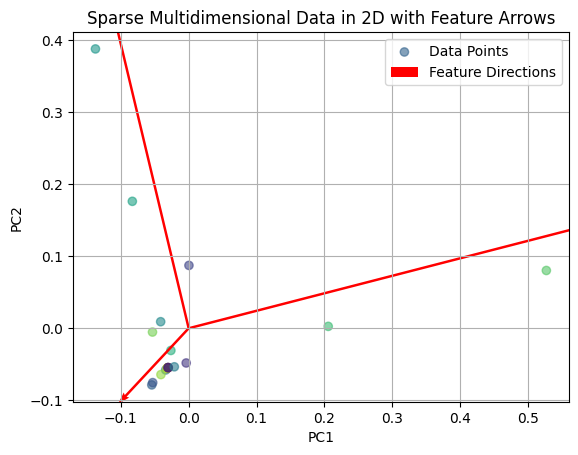

In [306]:
# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
projected_data = pca.fit_transform(D_np[sample_order])

# Get feature (column) loadings as arrows
feature_arrows = pca.components_.T  # Each feature contributes to the 2D space

# Plot data points
# plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.6, label="Data Points",
            # cmap='vlag', 
            c=sample_order)

# Plot feature arrows
origin = np.zeros((2, 3))  # Origin for arrows
plt.quiver(
    origin[0], origin[1], feature_arrows[:, 0], feature_arrows[:, 1], 
    angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label="Feature Directions"
)

# Labels and styling
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Sparse Multidimensional Data in 2D with Feature Arrows")
plt.legend()
plt.grid(True)
plt.show()

In [324]:
pca = PCA(n_components=1)
pca_pt = pca.fit_transform(X.T)

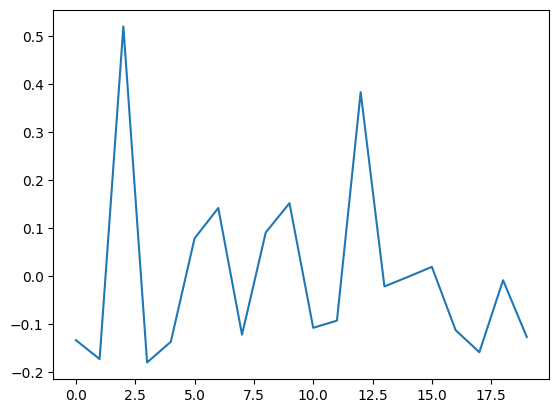

In [325]:
plt.plot(pca_pt)

In [268]:
from mpl_toolkits import mplot3d

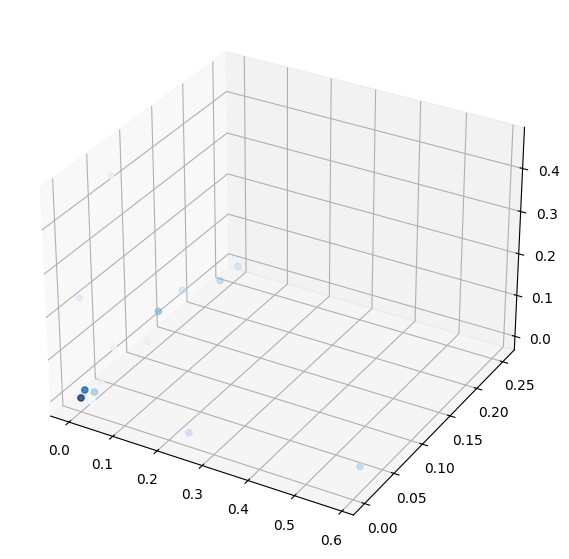

In [326]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# 3d scatter plot
ax.scatter3D(D_np[:, 0], D_np[:, 1], D_np[:, 2], 
             c=pca_pt, cmap='Blues')


In [297]:
X = X_cuda.cpu().numpy()

In [298]:
X

array([[7.52962634e-08, 4.61608453e-13, 1.20565652e-17, 2.70694015e-20,
        9.18037239e-13, 3.91995102e-17, 1.07246853e-24, 1.00815098e-22,
        6.77508526e-18, 1.30952691e-15, 9.02012337e-23, 1.17709430e-19,
        7.63387238e-13, 9.01433407e-24, 3.29138051e-16, 1.37979526e-12,
        3.53047401e-24, 1.37420643e-22, 5.06159308e-24, 2.64400643e-13],
       [3.22608481e-04, 4.83891576e-08, 8.42991909e-12, 1.00857555e-13,
        7.53584999e-08, 3.08461937e-11, 2.38551427e-17, 1.10687195e-15,
        7.21602986e-12, 2.99829273e-10, 6.61208689e-16, 2.84007057e-13,
        5.21813170e-08, 1.41076368e-16, 1.30412889e-10, 1.09027965e-07,
        6.85543998e-17, 1.34036738e-15, 8.65792808e-17, 2.75877223e-08],
       [5.68441115e-02, 2.08607395e-04, 2.42398897e-07, 1.54541659e-08,
        2.54396728e-04, 9.98228302e-07, 2.18216122e-11, 4.99777331e-10,
        3.16074335e-07, 2.82319570e-06, 1.99329692e-10, 2.81808656e-08,
        1.46687307e-04, 9.07992431e-11, 2.12505552e-06, 3.5429

In [332]:
np.argsort(pca_pt.T)[0]


array([ 3,  1, 17,  4,  0, 19,  7, 16, 10, 11, 13, 18, 14, 15,  5,  8,  6,
        9, 12,  2])

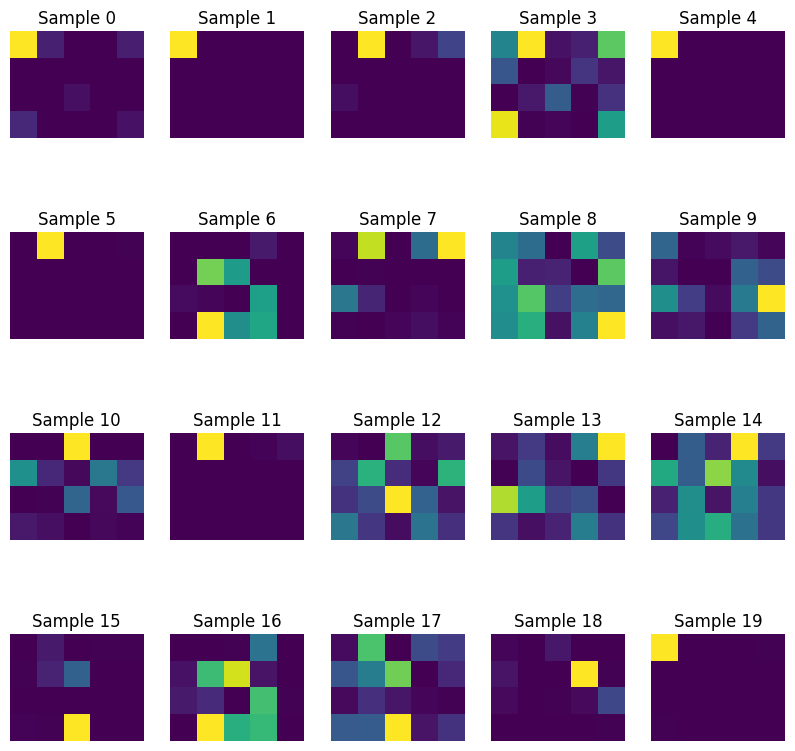

C:\Users\ecrob\AppData\Local\Temp\ipykernel_58732\2061223364.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"sample_{i}.png"))


In [333]:

# Every sample as a 2d image
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
for i in range(20):
    axes[i // 5, i % 5].imshow(X[np.argsort(pca_pt.T)[0]][
        i].reshape(4, 5))
    axes[i // 5, i % 5].axis('off')
    axes[i // 5, i % 5].set_title(f"Sample {i}")
plt.show()

# save as a gif
import imageio

images = []
for i in range(20):
    plt.imshow(X[i].reshape(4, 5))
    plt.axis('off')
    plt.title(f"Sample {i}")
    plt.savefig(f"sample_{i}.png")
    images.append(imageio.imread(f"sample_{i}.png"))
    plt.close()

imageio.mimsave('samples.gif', images)

